<a href="https://colab.research.google.com/github/slackoly/ES2245/blob/main/ES2245_lab3_sedlacko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 Lab 3: Probabilistic Reasoning in Earth Sciences

**Course:** ES2245, The Ohio State University

**Duration:** ~60 Minutes

**Objective:** Apply probability theory to seismic hazards, geochemical sampling, and flood risk using Python.



## 1. Discrete Events: Seismic Hazard Assessment (15 Minutes)
In seismology, we often look at the probability of an earthquake occurring within a specific window. Because tectonic stress builds up and is released, we can model the annual occurrence of an event as a **Bernoulli Trial** (a random experiment with exactly two outcomes: occurrence or non-occurrence).



### The Math
If the annual probability is $P(E)$, then the **Return Period** ($T$)—the average time interval between occurrences—is defined as:
$$T = \frac{1}{P(E)}$$

### 📝 Your Task:
The Wasatch Fault in Utah has an estimated annual probability of $P(E) = 0.003$ for a major event (Magnitude 7.0+).
1. Simulate **1,000 years** of activity.
2. Calculate the "Simulated Return Period" from your results.
3. Compare your result to the theoretical return period.

In [1]:
import numpy as np

# Parameters
p_earthquake = 0.003
years = 1000

# 1. TODO: Generate a numpy array 'events' of 0s and 1s using np.random.choice
# Hint: p=[1-p_earthquake, p_earthquake]
events = np.random.choice([0, 1], size=years, p=[1-p_earthquake, p_earthquake])

# 2. TODO: Count the total number of earthquakes
total_quakes = np.sum(events)

# 3. TODO: Calculate the simulated return period (Total Years / Total Quakes)
simulated_return_period = years / total_quakes

print(f"Total Earthquakes simulated: {total_quakes}")
print(f"Simulated Return Period: {simulated_return_period} years")
print(f"Theoretical Return Period: {1/p_earthquake} years")

Total Earthquakes simulated: 3
Simulated Return Period: 333.3333333333333 years
Theoretical Return Period: 333.3333333333333 years


## 2. Continuous Variables: Geochemical Sampling (15 Minutes)
Earth materials like soil, water, and rock contain varying concentrations of elements. When these values cluster around a central average, we use the **Normal (Gaussian) Distribution**.



### The Math
The probability density of the normal distribution is defined by the mean ($\mu$) and the standard deviation ($\sigma$). In a normal distribution:
* **68%** of data falls within $1\sigma$.
* **95%** of data falls within $2\sigma$.

### 📝 Your Task:
You are exploring a granite body for **Neodymium**. The mean concentration ($\mu$) is **35 ppm** with a standard deviation ($\sigma$) of **5 ppm**.
1. Generate **5,000 random samples** representing rock core measurements.
2. Plot a histogram to visualize the distribution of your ore body.
3. Calculate the percentage of samples that qualify as "High Grade" (defined as any sample **$> 45$ ppm**).

Percentage of High Grade Samples: 2.1399999999999997%


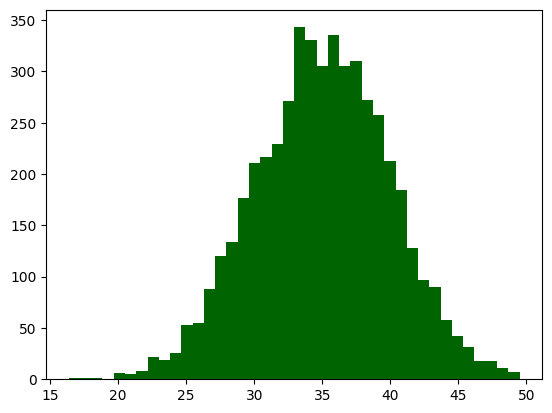

In [2]:
import matplotlib.pyplot as plt

mu = 35
sigma = 5
n_samples = 5000

# 1. TODO: Generate 5,000 samples using np.random.normal
samples = np.random.normal(mu, sigma, n_samples)

# 2. TODO: Plot the histogram using plt.hist()
# Use 40 bins and color='darkgreen'
plt.hist(samples, bins=40, color='darkgreen')


# 3. TODO: Use boolean indexing to find samples > 45 and calculate the percentage
high_grade_percentage = np.mean(samples > 45) * 100

print(f"Percentage of High Grade Samples: {high_grade_percentage}%")

## 3. Conditional Probability: Volcanic Unrest (15 Minutes)
Probabilities in Earth Science are rarely static. When new data (like seismic tremors or gas emissions) arrives, we use **Bayes' Theorem** to update our beliefs. This is known as calculating the **Posterior Probability**.



**The Scenario:**
* $P(Erup)$: The "Prior" probability of an eruption this month ($0.05$).
* $P(Seis)$: The probability of detecting a "Seismic Swarm" ($0.10$).
* $P(Seis | Erup)$: The probability that a swarm occurs *given* an eruption is actually starting ($0.80$).

### 📝 Your Task:
If a seismic swarm is detected today, what is the probability that the volcano is actually about to erupt? Use Bayes' Theorem to find $P(Erup | Seis)$:
$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

In [3]:
# Constants
p_erupt = 0.05
p_seismic = 0.10
p_seismic_given_erupt = 0.80

# TODO: Calculate p_erupt_given_seismic using the formula above
p_erupt_given_seismic = (p_seismic_given_erupt * p_erupt) / p_seismic

print(f"Probability of eruption given seismic activity: {p_erupt_given_seismic * 100}%")

Probability of eruption given seismic activity: 40.00000000000001%


## 4. Cumulative Risk: The "100-Year Flood" (15 Minutes)
A "100-year flood" does **not** happen exactly every 100 years. It simply has a $1\%$ ($0.01$) chance of occurring in any single year. To find the risk over a long period (like a 30-year mortgage), we use the complement of the probability of the event *never* happening.



### The Math
The probability of at least one event occurring over $n$ years is (note that the years is in the exponent):
$$P(\text{at least one}) = 1 - (1 - P(\text{annual}))^n$$

### 📝 Your Task:
1. Write a Python function to calculate cumulative flood risk.
2. Calculate the risk of a 100-year flood occurring over a **30-year** period and a **100-year** period.
3. Use a while loop to determine how many years it takes for the cumulative risk of a 100-year flood to exceed **50%**.

In [5]:
def calculate_flood_risk(years, p_annual=0.01):
    # TODO: Implement the formula
    risk = 1 - (1-p_annual) ** years
    return risk

# Test the function for a 30-year mortgage and a 100-year lifespan
print(f"30-Year Risk: {calculate_flood_risk(30) * 100:.2f}%")
print(f"100-Year Risk: {calculate_flood_risk(100) * 100:.2f}%")

# Create a loop or list comprehension to find
# how many years it takes for the cumulative risk to exceed 50%.

30-Year Risk: 26.03%
100-Year Risk: 63.40%
